In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt = pd.read_csv("Premier_League.csv", encoding = 'unicode_escape')
dt

,Players,Nationality,Playing Position,Clubs,Apperances,Minutes Per Goal,Assists,Penalty Goals,Substitutions On,Substitutions Off,Goals Per Game/Ratio,Goals
0,Alan Shearer,United Kingdom,Forward,2,441,147,65,55,14,28,0.59,260
1,Wayne Rooney,United Kingdom,Forward,2,491,183,111,23,70,111,0.42,208
2,Andy Cole,United Kingdom,Forward,7,415,169,52,0,65,74,0.45,187
3,Sergio Agüero,Argentina,Forward,1,275,108,55,27,40,131,0.67,184
4,Frank Lampard,United Kingdom,Midfielder,3,611,276,116,43,65,53,0.29,177
5,Thierry Henry,France,Forward,1,258,122,83,23,23,29,0.68,175
6,Harry Kane,United Kingdom,Forward,2,262,128,39,25,18,56,0.65,170
7,Robbie Fowler,United Kingdom,Forward,4,379,173,31,17,66,82,0.43,163
8,Jermain Defoe,United Kingdom,Forward,5,496,200,28,14,149,104,0.33,162
9,Michael Owen,United Kingdom,Forward,4,326,153,38,13,69,77,0.46,150


# Exploratory Data Analasis

In [3]:
dt.columns

Index(['Players', 'Nationality', 'Playing Position', 'Clubs', 'Apperances ',
       'Minutes Per Goal', 'Assists', 'Penalty Goals', 'Substitutions On',
       'Substitutions Off', 'Goals Per Game/Ratio', 'Goals'],
      dtype='object')

In [4]:
dt.shape

(50, 12)

In [5]:
dt.dtypes

Players                  object
Nationality              object
Playing Position         object
Clubs                     int64
Apperances                int64
Minutes Per Goal          int64
Assists                   int64
Penalty Goals             int64
Substitutions On          int64
Substitutions Off         int64
Goals Per Game/Ratio    float64
Goals                     int64
dtype: object

In [6]:
dt = dt.rename(columns = {'Goals Per Game/Ratio' : 'GPR'})
dt.dtypes

Players               object
Nationality           object
Playing Position      object
Clubs                  int64
Apperances             int64
Minutes Per Goal       int64
Assists                int64
Penalty Goals          int64
Substitutions On       int64
Substitutions Off      int64
GPR                  float64
Goals                  int64
dtype: object

In [7]:
dt.describe()

,Clubs,Apperances,Minutes Per Goal,Assists,Penalty Goals,Substitutions On,Substitutions Off,GPR,Goals
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,3.140000,324.400000,205.740000,46.120000,12.960000,54.960000,73.020000,0.394800,120.760000
std,1.873663,111.491374,67.406113,29.810038,11.277502,31.757345,27.578082,0.122111,37.995467
min,1.000000,150.000000,108.000000,2.000000,0.000000,11.000000,28.000000,0.170000,83.000000
25%,1.250000,252.500000,169.000000,28.000000,5.000000,36.000000,51.000000,0.330000,92.000000
50%,3.000000,278.500000,190.000000,41.000000,12.500000,48.500000,72.500000,0.380000,108.500000
75%,5.000000,378.000000,224.750000,55.000000,17.000000,68.000000,90.750000,0.437500,139.750000
max,7.000000,632.000000,426.000000,161.000000,55.000000,157.000000,133.000000,0.680000,260.000000


In [8]:
dt.isnull().sum()

Players              0
Nationality          0
Playing Position     0
Clubs                0
Apperances           0
Minutes Per Goal     0
Assists              0
Penalty Goals        0
Substitutions On     0
Substitutions Off    0
GPR                  0
Goals                0
dtype: int64

In [9]:
dt.describe(include = 'object')

,Players,Nationality,Playing Position
count,50,50,50
unique,50,20,2
top,Ruud Van Nistelrooy,United Kingdom,Forward
freq,1,23,41


In [10]:
dt_filter = dt[(dt['Players'] == 'Yakubu Aiyegbeni') | (dt.Players == 'Alan Shearer')]
dt_filter

,Players,Nationality,Playing Position,Clubs,Apperances,Minutes Per Goal,Assists,Penalty Goals,Substitutions On,Substitutions Off,GPR,Goals
0,Alan Shearer,United Kingdom,Forward,2,441,147,65,55,14,28,0.59,260
33,Yakubu Aiyegbeni,Nigeria,Forward,4,252,198,18,18,36,87,0.38,96


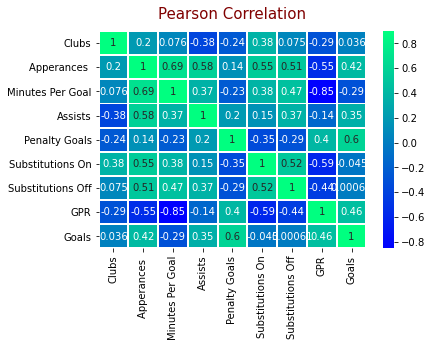

In [11]:
sns.heatmap(dt.corr(), vmax = 0.9, linewidths = 0.9, cmap = 'winter', annot = True)
plt.title('Pearson Correlation', fontsize = 15, pad = 12, color = 'maroon') #pad untuk mengatur jarak judul dengan grafik
plt.show()

In [12]:
dt.Players.unique()

array(['Alan Shearer', 'Wayne Rooney', 'Andy Cole', 'Sergio\xa0Agüero',
       'Frank\xa0Lampard', 'Thierry\xa0Henry', 'Harry\xa0Kane',
       'Robbie Fowler', 'Jermain Defoe', 'Michael\xa0Owen',
       'Les\xa0Ferdinand', 'Teddy\xa0Sheringham', 'Robin\xa0van Persie',
       'Jamie\xa0Vardy', 'Jimmy Floyd\xa0Hasselbaink', 'Robbie\xa0Keane',
       'Nicolas\xa0Anelka', 'Dwight\xa0Yorke', 'Steven\xa0Gerrard',
       'Romelu\xa0Lukaku', 'Mohamed\xa0Salah', 'Ian\xa0Wright',
       'Dion\xa0Dublin', 'Emile\xa0Heskey', 'Ryan\xa0Giggs',
       'Peter\xa0Crouch', 'Paul\xa0Scholes', 'Darren\xa0Bent',
       'Didier\xa0Drogba', 'Sadio Mane', 'Raheem\xa0Sterling',
       'Matt Le Tissier', 'Emmanuel Adebayor', 'Yakubu Aiyegbeni',
       'Ruud Van Nistelrooy', 'Dimitar Berbatov', 'Cristiano Ronaldo',
       'Kevin Phillips', 'Mark Viduka', 'Ole Gunnar Solskjaer',
       'James Beatie', 'Olivier Giroud', 'Dennis Bergkamp',
       'Kevin Davies', 'Christian Benteke', 'Fernando Torres',
       'Eden 

In [13]:
dt.Players = [str(i).replace('\xa0',' ') for i in dt['Players']]
dt.Players.unique()

array(['Alan Shearer', 'Wayne Rooney', 'Andy Cole', 'Sergio Agüero',
       'Frank Lampard', 'Thierry Henry', 'Harry Kane', 'Robbie Fowler',
       'Jermain Defoe', 'Michael Owen', 'Les Ferdinand',
       'Teddy Sheringham', 'Robin van Persie', 'Jamie Vardy',
       'Jimmy Floyd Hasselbaink', 'Robbie Keane', 'Nicolas Anelka',
       'Dwight Yorke', 'Steven Gerrard', 'Romelu Lukaku', 'Mohamed Salah',
       'Ian Wright', 'Dion Dublin', 'Emile Heskey', 'Ryan Giggs',
       'Peter Crouch', 'Paul Scholes', 'Darren Bent', 'Didier Drogba',
       'Sadio Mane', 'Raheem Sterling', 'Matt Le Tissier',
       'Emmanuel Adebayor', 'Yakubu Aiyegbeni', 'Ruud Van Nistelrooy',
       'Dimitar Berbatov', 'Cristiano Ronaldo', 'Kevin Phillips',
       'Mark Viduka', 'Ole Gunnar Solskjaer', 'James Beatie',
       'Olivier Giroud', 'Dennis Bergkamp', 'Kevin Davies',
       'Christian Benteke', 'Fernando Torres', 'Eden Hazard',
       'Carlos Tevez', 'Louis Saha', 'Chris Sutton'], dtype=object)

In [14]:
dt.Players.value_counts()

Jimmy Floyd Hasselbaink    1
Eden Hazard                1
Romelu Lukaku              1
Frank Lampard              1
Steven Gerrard             1
Matt Le Tissier            1
James Beatie               1
Robin van Persie           1
Sadio Mane                 1
Jamie Vardy                1
Yakubu Aiyegbeni           1
Paul Scholes               1
Harry Kane                 1
Ruud Van Nistelrooy        1
Darren Bent                1
Fernando Torres            1
Robbie Keane               1
Mark Viduka                1
Raheem Sterling            1
Mohamed Salah              1
Thierry Henry              1
Louis Saha                 1
Teddy Sheringham           1
Carlos Tevez               1
Nicolas Anelka             1
Kevin Phillips             1
Ryan Giggs                 1
Dion Dublin                1
Ole Gunnar Solskjaer       1
Ian Wright                 1
Didier Drogba              1
Peter Crouch               1
Cristiano Ronaldo          1
Andy Cole                  1
Jermain Defoe 

In [15]:
dt.Nationality.unique()

array(['United Kingdom', 'Argentina', 'France', 'Netherlands', 'Ireland',
       'Trinidada & Tobaco', 'Belgium', 'Egypt', 'Wales', 'Ivory Coast',
       'Senegal', 'Togo', 'Nigeria', 'Bulgaria', 'Portugal', 'Australia',
       'Norway', 'Spain', 'France ', 'England'], dtype=object)

In [16]:
dt.Nationality.value_counts()

United Kingdom        23
Netherlands            4
Belgium                3
France                 3
Argentina              2
Wales                  1
Norway                 1
Egypt                  1
France                 1
Senegal                1
Togo                   1
Ivory Coast            1
Australia              1
Portugal               1
Ireland                1
England                1
Nigeria                1
Spain                  1
Bulgaria               1
Trinidada & Tobaco     1
Name: Nationality, dtype: int64

In [17]:
dt.Nationality.value_counts()
len(dt.Nationality.value_counts())

20

In [18]:
count_players_nationality = dt.groupby('Nationality')['Players'].count()
len(count_players_nationality)

20

In [19]:
dt['Playing Position'].unique()

array(['Forward', 'Midfielder'], dtype=object)

In [20]:
count_playing_position = dt.groupby('Playing Position')['Players'].count()
count_playing_position

Playing Position
Forward       41
Midfielder     9
Name: Players, dtype: int64

In [21]:
dt = dt.rename(columns = {'Apperances ' : 'Apr'})
dt

,Players,Nationality,Playing Position,Clubs,Apr,Minutes Per Goal,Assists,Penalty Goals,Substitutions On,Substitutions Off,GPR,Goals
0,Alan Shearer,United Kingdom,Forward,2,441,147,65,55,14,28,0.59,260
1,Wayne Rooney,United Kingdom,Forward,2,491,183,111,23,70,111,0.42,208
2,Andy Cole,United Kingdom,Forward,7,415,169,52,0,65,74,0.45,187
3,Sergio Agüero,Argentina,Forward,1,275,108,55,27,40,131,0.67,184
4,Frank Lampard,United Kingdom,Midfielder,3,611,276,116,43,65,53,0.29,177
5,Thierry Henry,France,Forward,1,258,122,83,23,23,29,0.68,175
6,Harry Kane,United Kingdom,Forward,2,262,128,39,25,18,56,0.65,170
7,Robbie Fowler,United Kingdom,Forward,4,379,173,31,17,66,82,0.43,163
8,Jermain Defoe,United Kingdom,Forward,5,496,200,28,14,149,104,0.33,162
9,Michael Owen,United Kingdom,Forward,4,326,153,38,13,69,77,0.46,150


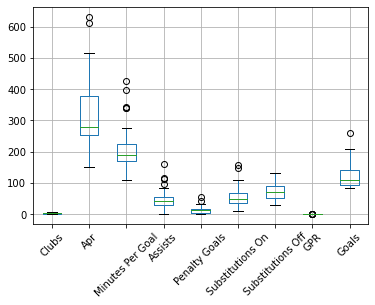

In [22]:
chart = dt.boxplot()
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.show()

In [23]:
dt.corr()['Goals'].sort_values(ascending = False) #Hubungan antara goals dengan kolom lain

Goals                1.000000
Penalty Goals        0.602419
GPR                  0.457446
Apr                  0.421722
Assists              0.351686
Clubs                0.036315
Substitutions Off    0.000608
Substitutions On    -0.045420
Minutes Per Goal    -0.292944
Name: Goals, dtype: float64

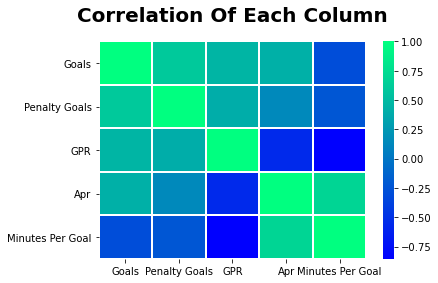

In [24]:
sns.heatmap(dt[['Goals','Penalty Goals','GPR','Apr','Minutes Per Goal']].corr(),linewidth = 1, cmap = 'winter')
plt.title('Correlation Of Each Column', fontdict = {'fontsize' : 20, 'weight' : 'bold'}, pad = 20)
plt.show()

# Visualization

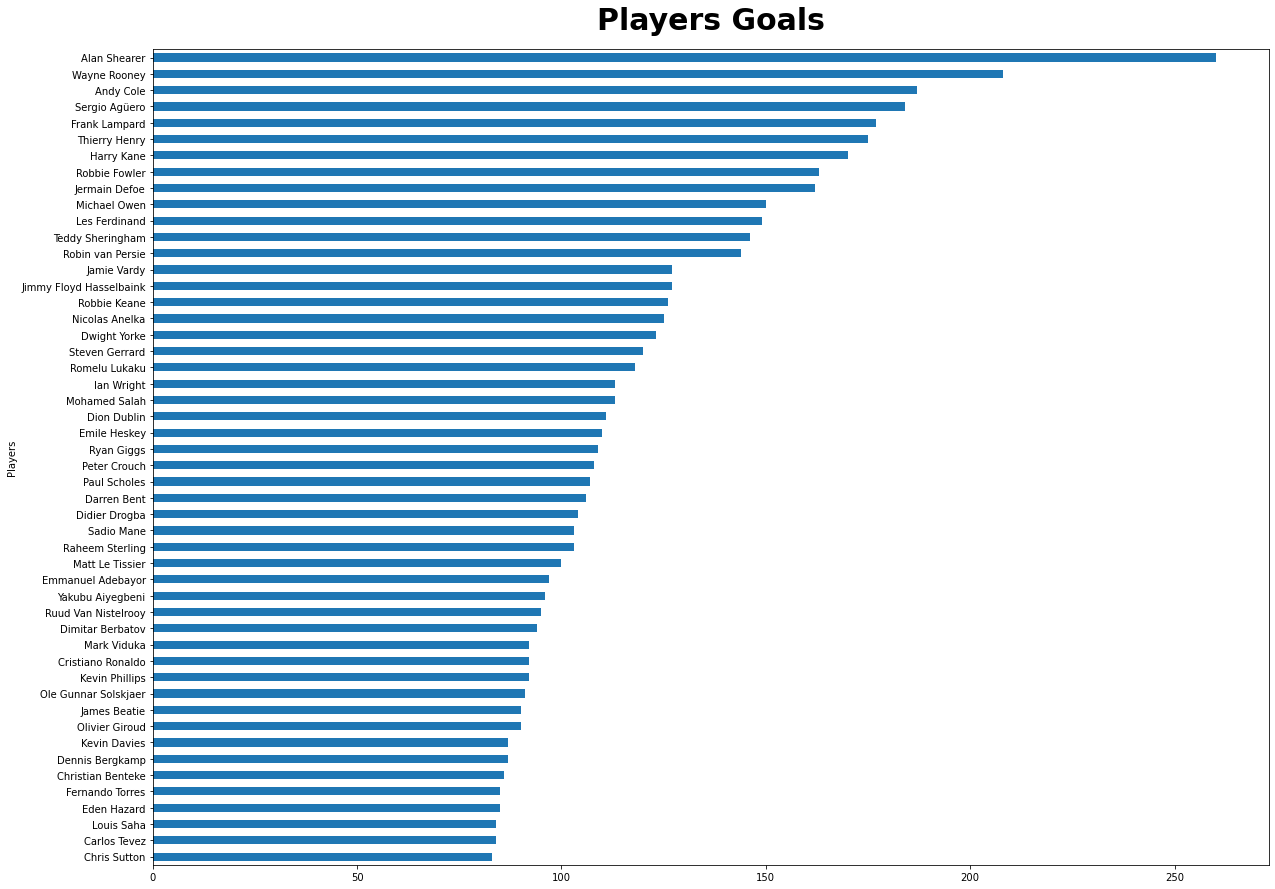

In [25]:
dt.groupby('Players')['Goals'].sum().sort_values().plot(kind = 'barh', figsize = (20,15))
plt.title('Players Goals', fontdict = {'fontsize' : 30, 'weight' : 'bold'}, pad = 20)
plt.show()

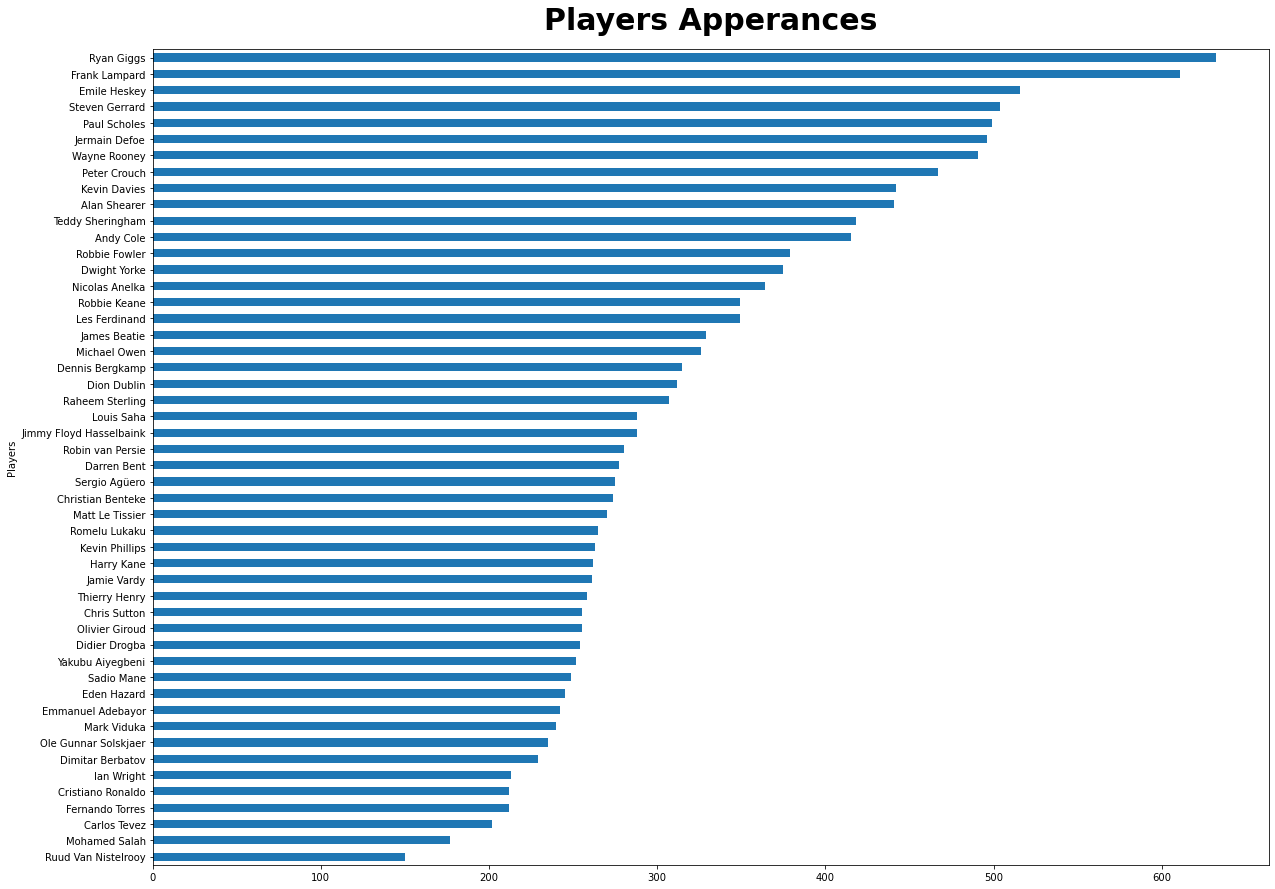

In [26]:
dt.groupby('Players')['Apr'].sum().sort_values().plot(kind = 'barh', figsize = (20,15))
plt.title('Players Apperances', fontdict={'fontsize': 30, 'weight' : 'bold'}, pad = 20)
plt.show()

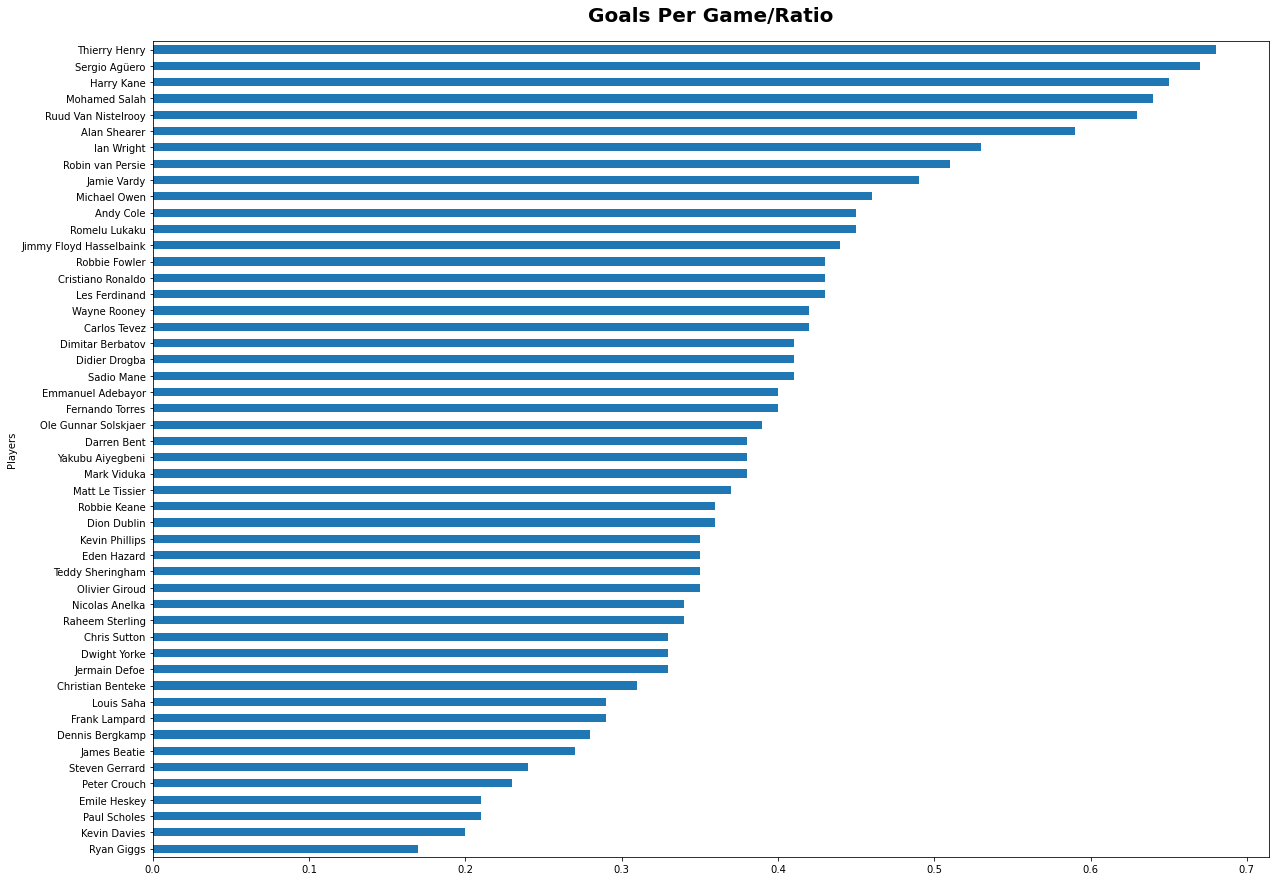

In [27]:
dt.groupby('Players')['GPR'].sum().sort_values().plot(kind = 'barh', figsize = (20,15))
plt.title('Goals Per Game/Ratio', fontdict = {'fontsize' : 20, 'weight' : 'bold'}, pad = 20)
plt.show()

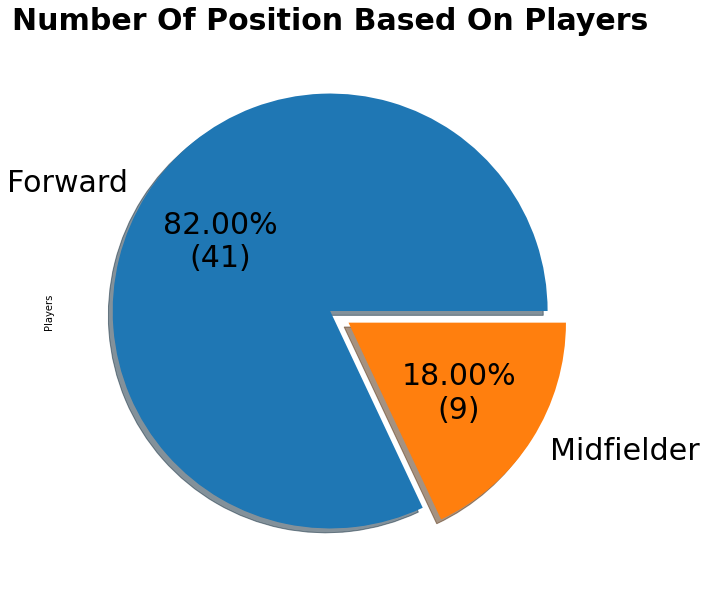

In [28]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total / 100.0)) #pct didapatkan dari autopct pada grafik pie
        return '{p:.2f}%\n({v:d})'.format(p = pct, v = val)
    return my_autopct

count_playing_position.plot(kind = 'pie', autopct = make_autopct(count_playing_position), 
                         explode = (0, 0.1), fontsize = 30, figsize = (20,10), shadow = True)
plt.title('Number Of Position Based On Players', fontdict = {'fontsize' : 30 ,  'weight' : 'bold'}, pad = 10)
plt.show()

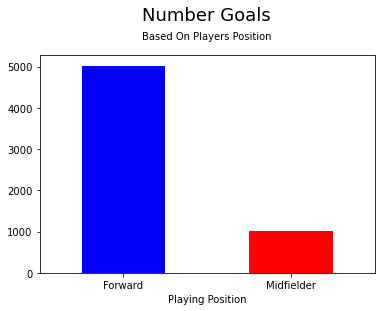

In [29]:
dt.groupby('Playing Position')['Goals'].sum().plot(kind = 'bar', color = ['blue','red'])
plt.xticks(rotation = 0)
plt.suptitle('Number Goals\n',fontsize = 18, y = 1.05, x = 0.51)
plt.title('Based On Players Position', fontsize = 10, pad = 16, loc = 'center')
plt.show()

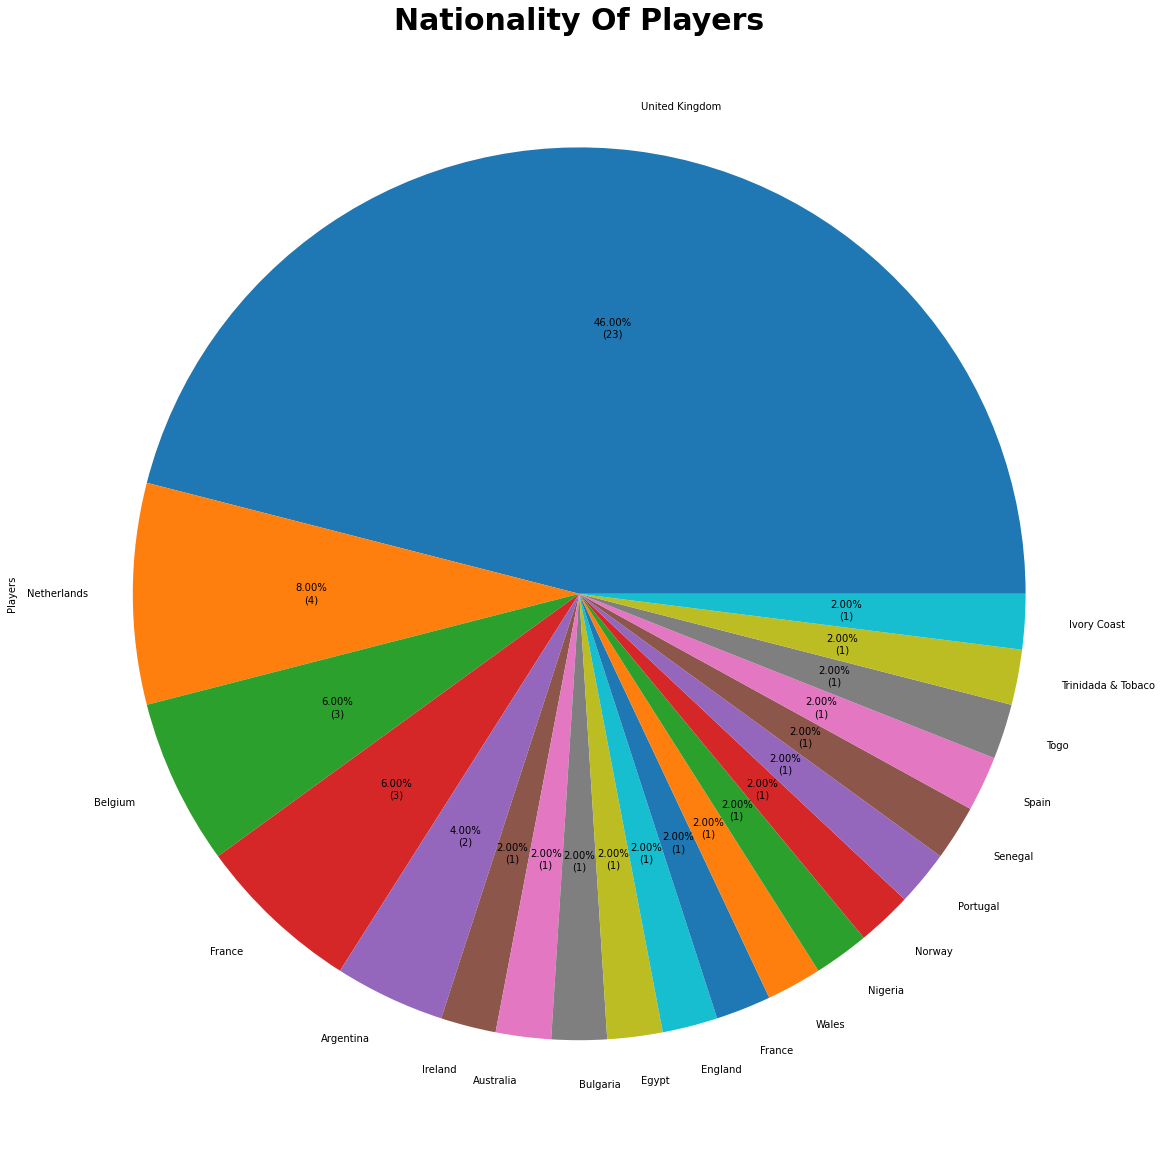

In [30]:
count_players_nationality.sort_values(ascending = False).plot(kind = 'pie', 
                                                             autopct = make_autopct(count_players_nationality), 
                                                             fontsize = 10, figsize=(20,30))
plt.title('Nationality Of Players', fontsize = 30, weight = 'bold')
plt.show()

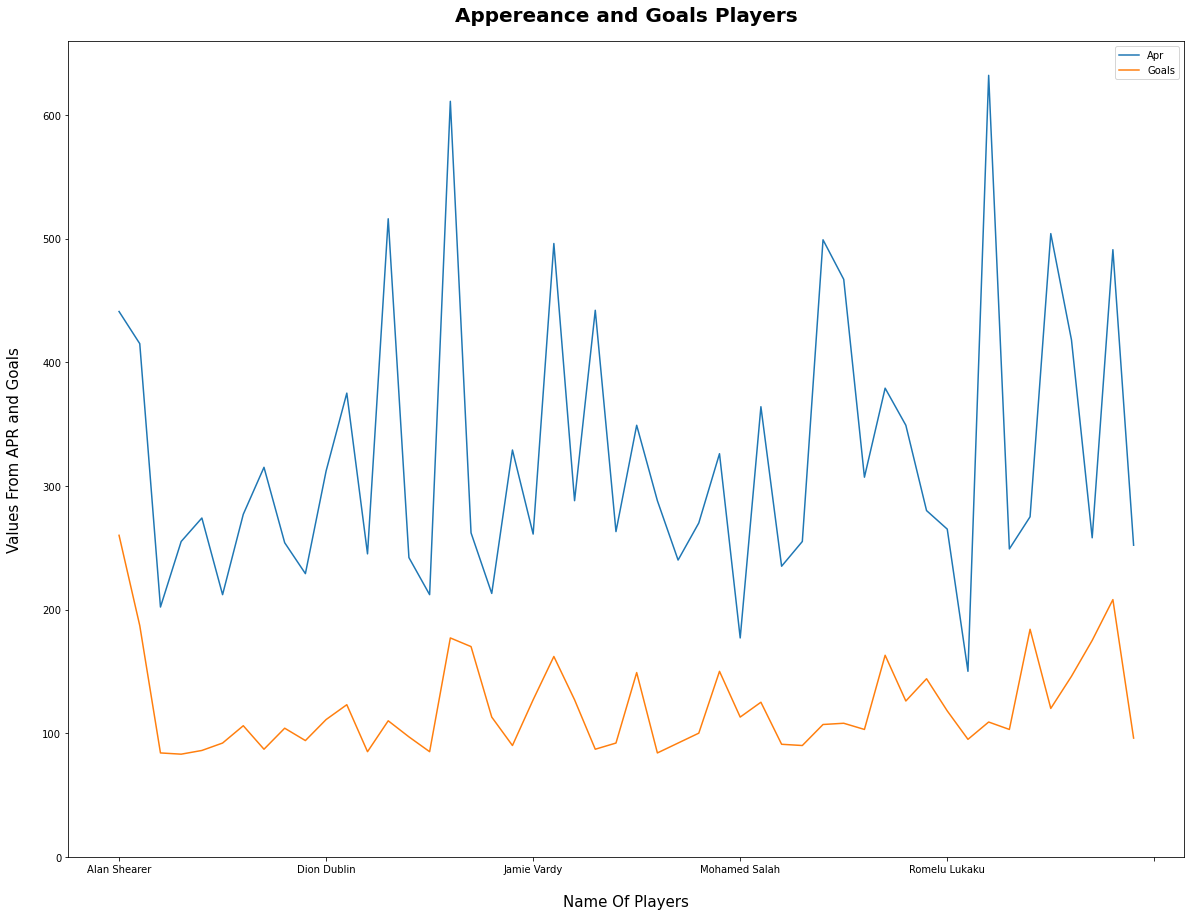

In [31]:
dt.groupby('Players')[['Apr','Goals']].sum().plot(kind = 'line', figsize = (20,15))
plt.xlabel('Name Of Players', fontsize = 15, labelpad = 20)
plt.ylim(ymin = 0)
plt.ylabel('Values From APR and Goals', fontsize = 15, labelpad = 20)
plt.title('Appereance and Goals Players', fontsize =  20, weight = 'bold', pad = 20)
plt.show()

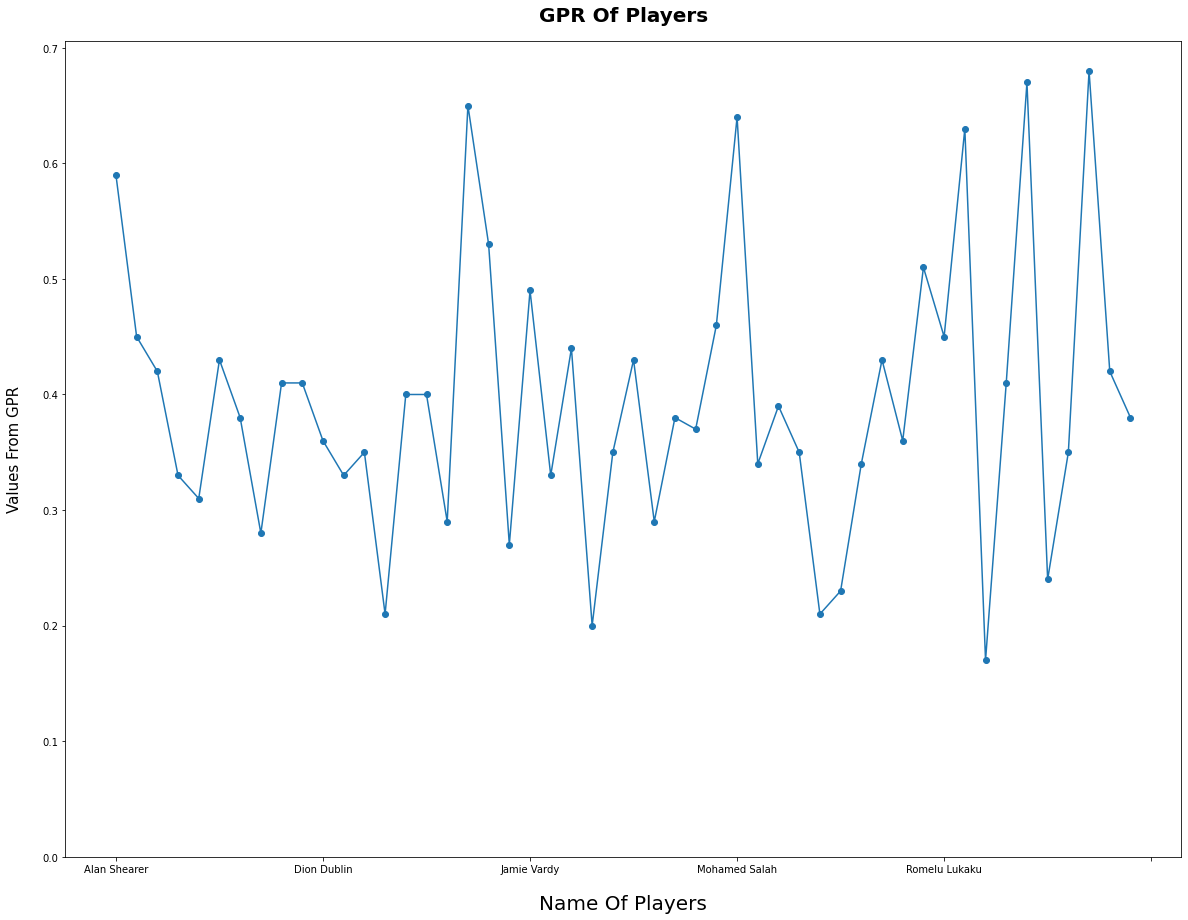

In [32]:
dt.groupby('Players')['GPR'].sum().plot(kind = 'line', figsize = (20,15), marker = 'o')
plt.xlabel('Name Of Players', fontdict = {'fontsize' : 20}, labelpad = 20)
plt.ylim(ymin = 0)
plt.ylabel('Values From GPR', fontsize = 15, labelpad = 20)
plt.title('GPR Of Players', fontsize = 20, pad = 20, weight = 'bold')
plt.show()